<a href="https://colab.research.google.com/github/toplyn/structured/blob/master/Python_Exercise_1_Basic_Ad_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Import libraries for analysis and linear regression
import pandas as pd
import time
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [0]:
## Mount google drive to access data file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Load data from drive
final = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
pony = pd.read_csv(final)

In [0]:
## Understand dataset 
print(pony.head())

   Start Date  ... Cost per Page Engagement (USD)
0  2013-12-02  ...                       1.219512
1  2013-12-01  ...                       1.395349
2  2013-11-30  ...                       1.190476
3  2013-11-29  ...                       1.167315
4  2013-11-22  ...                       2.512857

[5 rows x 20 columns]


In [0]:
pony.columns

Index(['Start Date', 'End Date', 'Account', 'Campaign Name', 'Reach',
       'Frequency', 'Impressions', 'Clicks', 'Unique Clicks',
       'Amount Spent (USD)', 'Page Likes', 'Page Engagement',
       'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares',
       'Photo Views', 'Website Clicks', 'Cost per Page Like (USD)',
       'Cost per Page Engagement (USD)'],
      dtype='object')

In [0]:
## Create 'cost per impression' column
pony['cost_per_impression'] = pony['Amount Spent (USD)'] / pony['Impressions']

In [0]:
## Convert date and create day of week 
pony['date'] = pd.to_datetime(pony['Start Date'])
pony['day_of_week'] = pony['date'].dt.day_name()

In [0]:
## Pivot data by day of week with means
pny_pivot = pony.pivot_table(index = 'day_of_week', aggfunc = 'mean')

In [0]:
## Which day of the week has the highest cost per impression
pny_pivot['cost_per_impression']

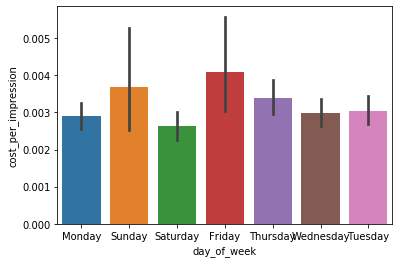

In [0]:
sns.barplot(x = pony['day_of_week'], y = pony['cost_per_impression'])

In [0]:
## Create correlation analysis
pony_corrs = {}
dependents = ['Reach','Frequency','Unique Clicks','Page Likes']
for i in dependents:
  pony_corrs[i] = np.corrcoef(pony['Amount Spent (USD)'], pony[i])[0,1]

In [0]:
## What is most correlated with spend
pony_corrs

{'Frequency': 0.13020086992866314,
 'Page Likes': 0.7576119292180449,
 'Reach': 0.7031238065113837,
 'Unique Clicks': 0.8829931774784122}

In [0]:
## Create linear regression to analyze what impacts clicks
pny_target = pony['Unique Clicks']
dependentx = pony[["Reach","Frequency"]]
mods = sm.OLS(pny_target, dependentx).fit()
print(mods.summary())

                                 OLS Regression Results                                
Dep. Variable:          Unique Clicks   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.556
Method:                 Least Squares   F-statistic:                              2325.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:29:37   Log-Likelihood:                         -15973.
No. Observations:                3705   AIC:                                  3.195e+04
Df Residuals:                    3703   BIC:                                  3.196e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------